Reading file /media/lan/Treasure/ly62/dist_fn0023.sdf
t() = time
x(1501, 301, 301) = grid
y(1501, 301, 301) = grid
z(1501, 301, 301) = grid
xc(1500, 300, 300) = grid_mid
yc(1500, 300, 300) = grid_mid
zc(1500, 300, 300) = grid_mid
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [20,  2,  2]
Grid_CPUs_Original_rank <class 'sdf.BlockPlainMesh'> [21,  3,  3]
Grid_CPUs_Original_rank_mid <class 'sdf.BlockPlainMesh'> [20,  2,  2]
Grid_Grid <class 'sdf.BlockPlainMesh'> [1501,  301,  301]
Grid_Grid_mid <class 'sdf.BlockPlainMesh'> [1500,  300,  300]
Grid_angle_xy_bw_electron <class 'sdf.BlockPlainMesh'> [360]
Grid_angle_xy_bw_electron_mid <class 'sdf.BlockPlainMesh'> [359]
Grid_angle_xy_bw_positron <class 'sdf.BlockPlainMesh'> [360]
Grid_angle_xy_bw_positron_mid <class 'sdf.BlockPlainMesh'> [359]
Grid_angle_xy_electron <class 'sdf.BlockPlainMesh'> [360]
Grid_angle_xy_electron_mid <class 'sdf.BlockPlainMesh'> [359]
Grid_angle_xy_ph

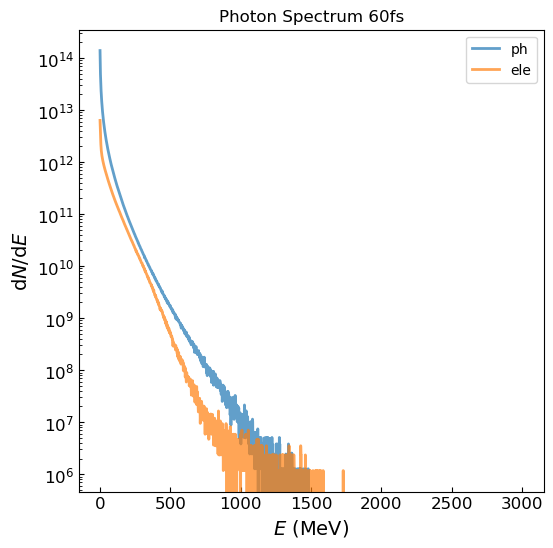

In [13]:
import sdf_helper as sh
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os


# 数据变换
E_eV_to_E_J = 1.6e-19
E_J_to_E_eV = 1/E_eV_to_E_J


distfun_Data1 = sh.getdata('/media/lan/Treasure/ly62/dist_fn0023.sdf')
distfun_Data2 = sh.getdata('/media/lan/Treasure/ly62/dist_fn0023.sdf')

sh.list_variables(distfun_Data1)

E1 = distfun_Data1.Grid_en_photon.data[0]
E2 = distfun_Data2.Grid_en_electron.data[0]

E1_MeV =1e-6 * E_J_to_E_eV * E1
E2_MeV =1e-6 * E_J_to_E_eV * E2

dE1_MeV = np.mean(np.diff(E1_MeV))
dE2_MeV = np.mean(np.diff(E2_MeV))

dN1 = distfun_Data1.dist_fn_en_photon.data
dN2 = distfun_Data2.dist_fn_en_electron.data

spectrum1 = dN1/dE1_MeV
spectrum2 = dN2/dE2_MeV

fig,ax = plt.subplots(figsize = (6,6))

ax.semilogy(E1_MeV,spectrum1, label="ph",linewidth=2,alpha = 0.7)
ax.semilogy(E2_MeV,spectrum2, label="ele",linewidth=2,alpha = 0.7)

# # 设置标签和标题
ax.set_xlabel(r'$E$ (MeV)', fontsize=14)
ax.set_ylabel(r'd$N$/d$E$', fontsize=14)
ax.set_title('Photon Spectrum 60fs')
ax.tick_params(axis='both', direction='in', which='both', labelsize=12)
    # axis='both'：同时设置 x 轴和 y 轴的刻度。
    # direction='in'：将刻度方向设置为向内（指向图形内部）。
    # which='both'：同时设置主刻度和副刻度的刻度方向。
    # labelsize=12：将刻度标签的字体大小设置为 12 磅。
# ax.set_xlim(0,2)
ax.legend()
plt.show()